In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
plt.style.use("bmh")

In [2]:
DATA_PATH = "../data/ny-pv-2006/"
print(len(os.listdir(DATA_PATH)))

387


In [3]:
times_series = {"Actual": {"UPV": [], "DPV": []}, "DA": {"UPV": [], "DPV": []}, "HA4": {"UPV": [], "DPV": []}}
for file in os.listdir(DATA_PATH)[:100]:
    x = pd.read_csv(DATA_PATH + file)[["Power(MW)"]].to_numpy()
    
    data_type = ""
    if file.startswith("Actual"):
        data_type = "Actual"
    elif file.startswith("DA"):
        data_type = "DA"
    elif file.startswith("HA4"):
        data_type = "HA4"
    
    pv_type = ""
    if "DPV" in file:
        pv_type = "DPV"
    else:
        pv_type = "UPV"
    
    times_series[data_type][pv_type].append(x.tolist())

for data_type in ["Actual", "DA", "HA4"]:
    for pv_type in ["DPV", "UPV"]:
        data = np.array(times_series[data_type][pv_type])
        times_series[data_type][pv_type] = data.reshape((-1,  365, 1))
        print(data_type, pv_type, times_series[data_type][pv_type].shape)

Actual DPV (4896, 365, 1)
Actual UPV (2304, 365, 1)
DA DPV (432, 365, 1)
DA UPV (408, 365, 1)
HA4 DPV (504, 365, 1)
HA4 UPV (456, 365, 1)


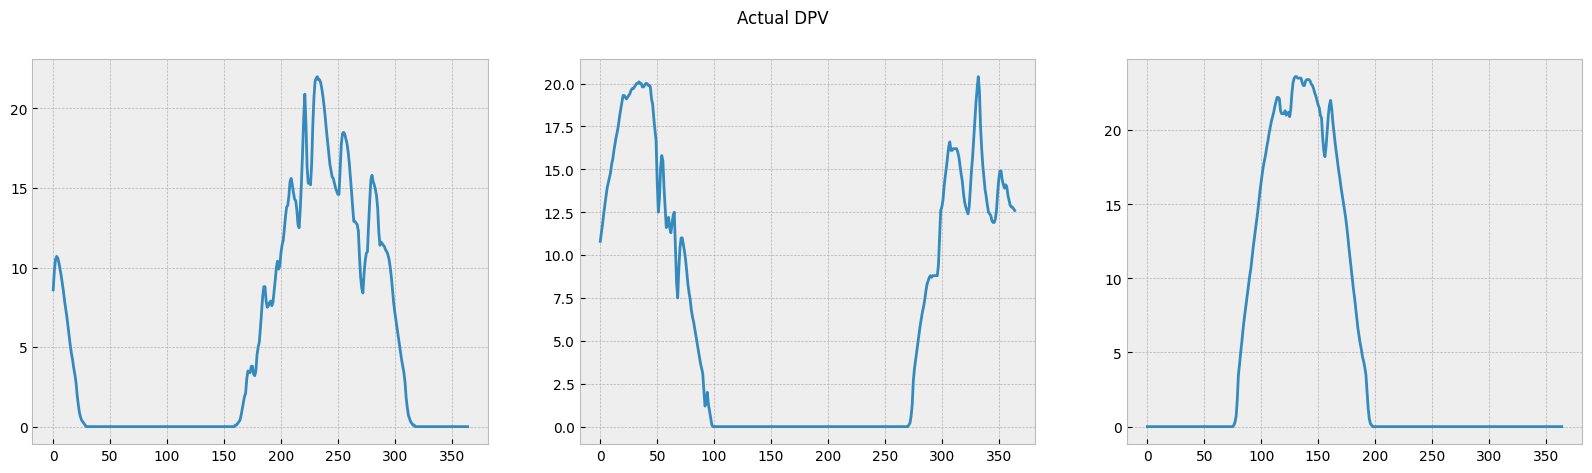

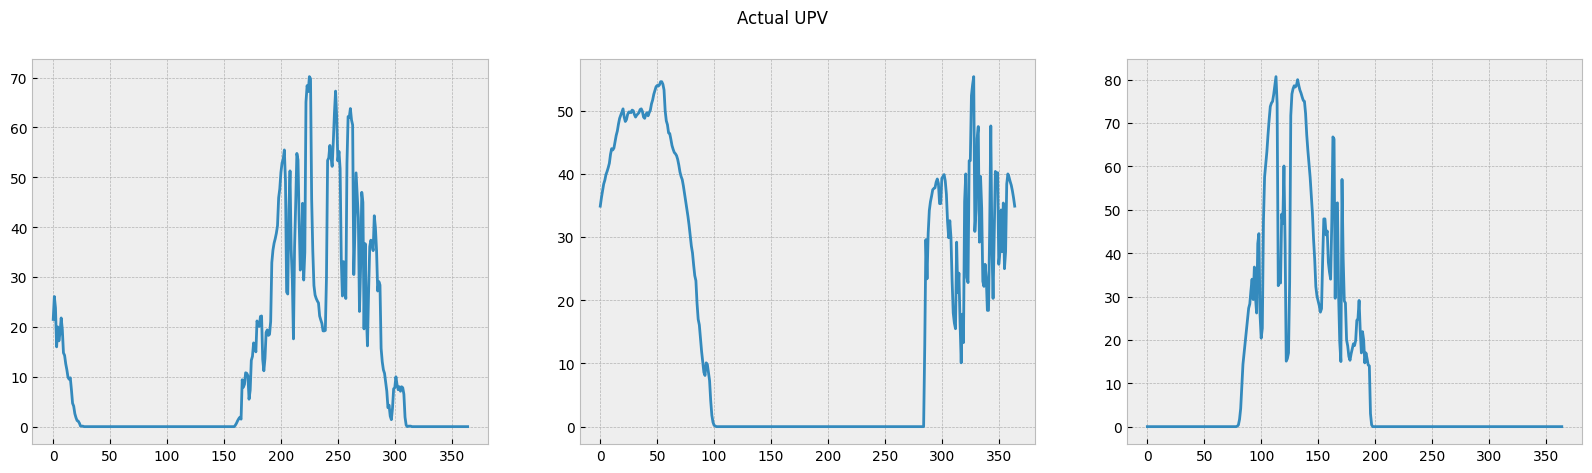

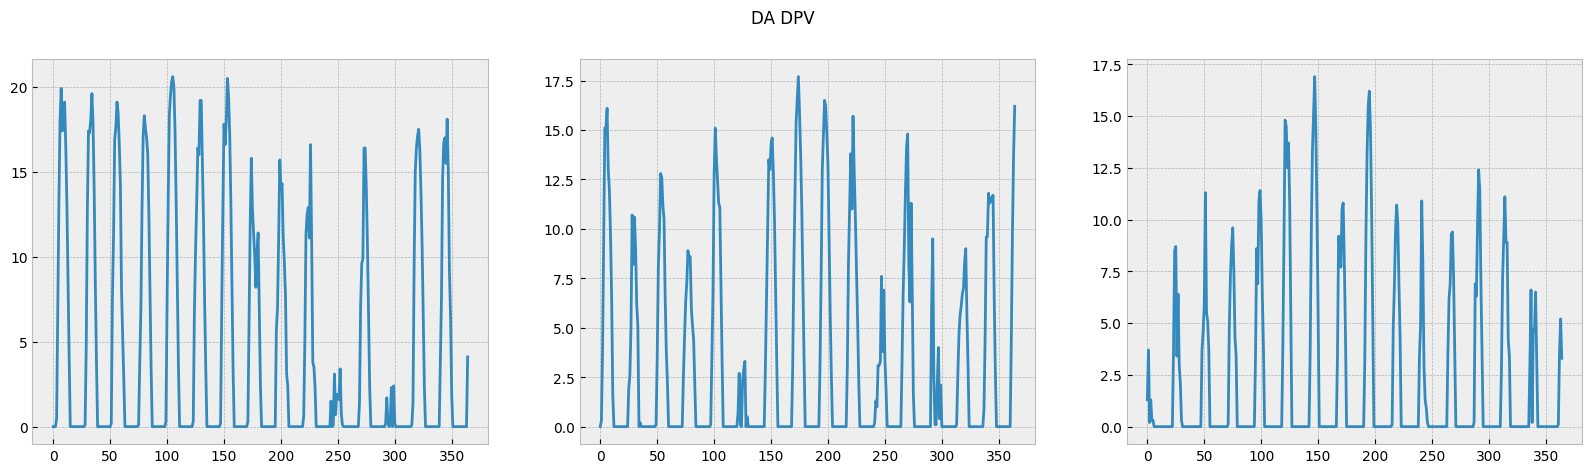

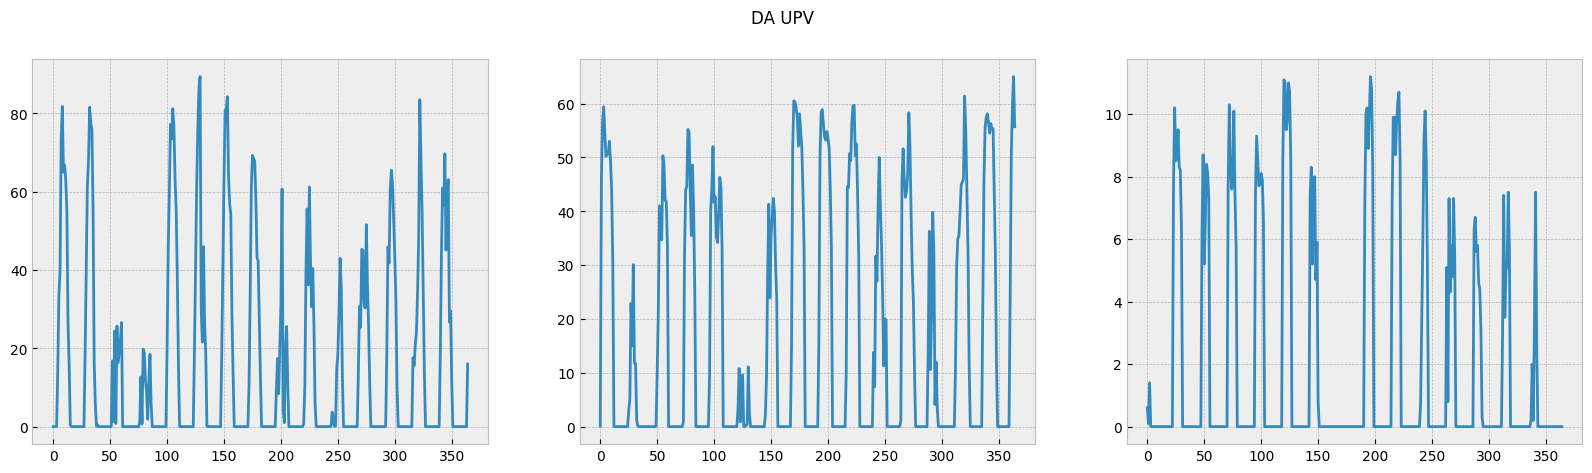

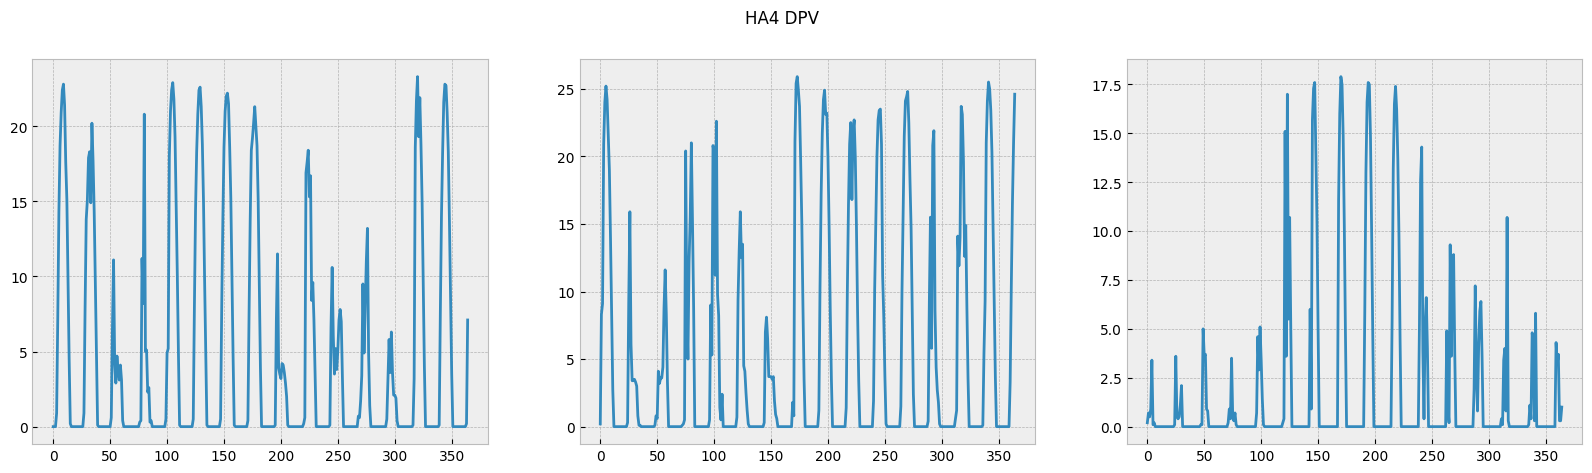

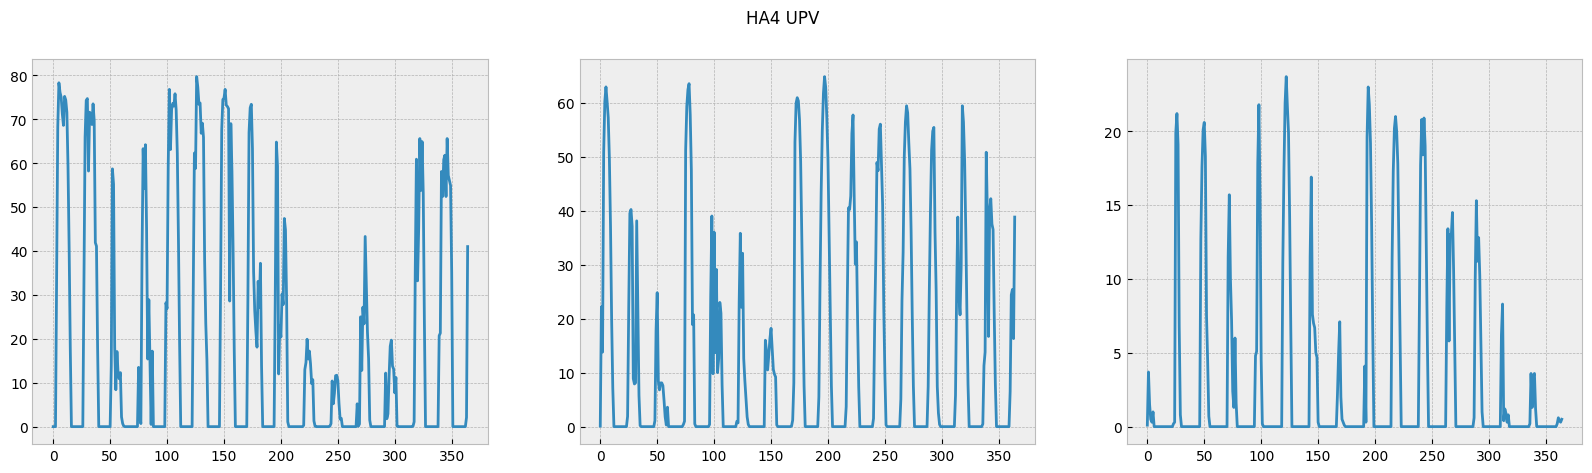

In [4]:
for data_type in ["Actual", "DA", "HA4"]:
    for pv_type in ["DPV", "UPV"]:
        plt.figure(figsize=(20, 5))
        plt.suptitle(f"{data_type} {pv_type}")
        for i, idx in enumerate([111, 222, 333], 1):
            x = times_series[data_type][pv_type][idx]
            plt.subplot(1, 3, i)
            plt.plot(x[:, 0])
        plt.show()